In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('averageDelay.csv', sep='\t', names=['month', 'to_split'])
df

,month,to_split
0,1,"[9.51739905695707,5.6533274605930615]"
1,2,"[11.329804213042678,7.903148015685324]"
2,3,"[9.457096004060977,4.801888513459922]"
3,4,"[7.654192199954241,3.1247219937710113]"
4,5,"[9.352638769560135,4.4186718927630775]"
5,6,"[13.744596613990558,9.391036263363347]"
6,7,"[11.2960393149459,6.353538767624703]"
7,8,"[9.840240453170786,4.547990739144742]"
8,9,"[4.803557832522486,-0.7679300391873465]"
9,10,"[4.958688922485164,-0.7751133874301934]"


In [3]:
df.to_split.str[1:-1].str.split(',').apply(pd.Series)

,0,1
0,9.51739905695707,5.6533274605930615
1,11.329804213042678,7.903148015685324
2,9.457096004060977,4.801888513459922
3,7.654192199954241,3.1247219937710113
4,9.352638769560135,4.4186718927630775
5,13.744596613990558,9.391036263363347
6,11.2960393149459,6.353538767624703
7,9.840240453170786,4.547990739144742
8,4.803557832522486,-0.7679300391873465
9,4.958688922485164,-0.7751133874301934


In [4]:
df[['dep_delay', 'arr_delay']] = df.to_split.str[1:-1].str.split(',').apply(pd.Series)
df

,month,to_split,dep_delay,arr_delay
0,1,"[9.51739905695707,5.6533274605930615]",9.51739905695707,5.6533274605930615
1,2,"[11.329804213042678,7.903148015685324]",11.329804213042678,7.903148015685324
2,3,"[9.457096004060977,4.801888513459922]",9.457096004060977,4.801888513459922
3,4,"[7.654192199954241,3.1247219937710113]",7.654192199954241,3.1247219937710113
4,5,"[9.352638769560135,4.4186718927630775]",9.352638769560135,4.4186718927630775
5,6,"[13.744596613990558,9.391036263363347]",13.744596613990558,9.391036263363347
6,7,"[11.2960393149459,6.353538767624703]",11.2960393149459,6.353538767624703
7,8,"[9.840240453170786,4.547990739144742]",9.840240453170786,4.547990739144742
8,9,"[4.803557832522486,-0.7679300391873465]",4.803557832522486,-0.7679300391873465
9,10,"[4.958688922485164,-0.7751133874301934]",4.958688922485164,-0.7751133874301934


In [5]:
df = df.drop(columns='to_split')

In [6]:
df

,month,dep_delay,arr_delay
0,1,9.51739905695707,5.6533274605930615
1,2,11.329804213042678,7.903148015685324
2,3,9.457096004060977,4.801888513459922
3,4,7.654192199954241,3.1247219937710113
4,5,9.352638769560135,4.4186718927630775
5,6,13.744596613990558,9.391036263363347
6,7,11.2960393149459,6.353538767624703
7,8,9.840240453170786,4.547990739144742
8,9,4.803557832522486,-0.7679300391873465
9,10,4.958688922485164,-0.7751133874301934


In [7]:
df['month'] = df['month'].astype(float)
df['dep_delay'] = df['dep_delay'].astype(float)
df['arr_delay'] = df['arr_delay'].astype(float)

In [8]:
df

,month,dep_delay,arr_delay
0,1.0,9.517399,5.653327
1,2.0,11.329804,7.903148
2,3.0,9.457096,4.801889
3,4.0,7.654192,3.124722
4,5.0,9.352639,4.418672
5,6.0,13.744597,9.391036
6,7.0,11.296039,6.353539
7,8.0,9.840240,4.547991
8,9.0,4.803558,-0.767930
9,10.0,4.958689,-0.775113


In [9]:
import plotly.express as px

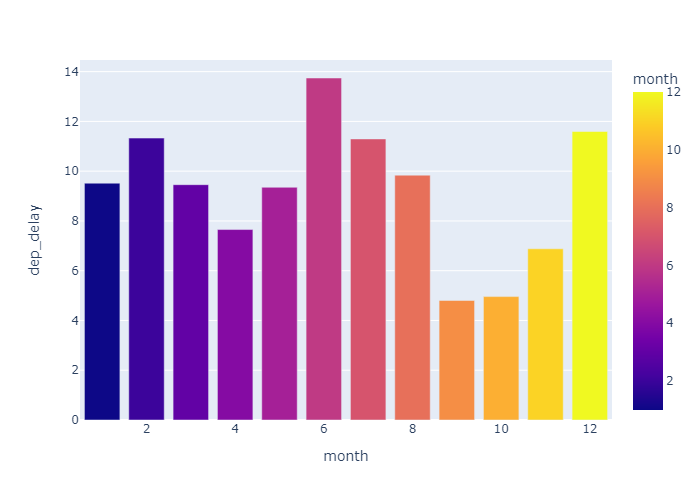

In [16]:
fig = px.bar(df, x='month', y='dep_delay', color='month')
fig.show("png")

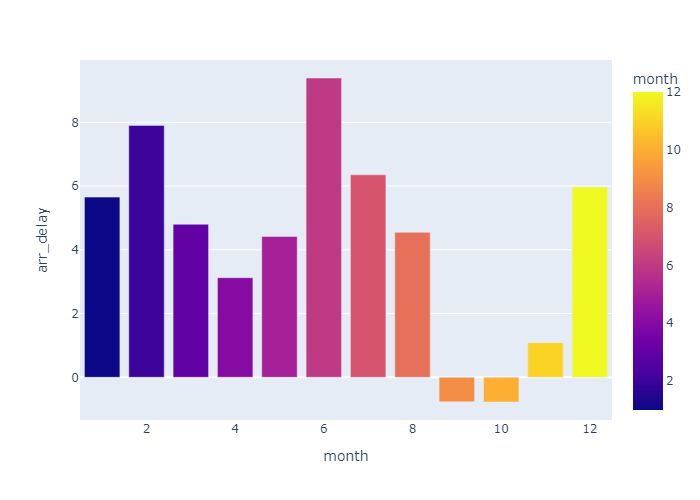

In [12]:
fig = px.bar(df, x='month', y='arr_delay', color='month', orientation='v')
fig.show("png")

In [13]:
import plotly.graph_objects as go

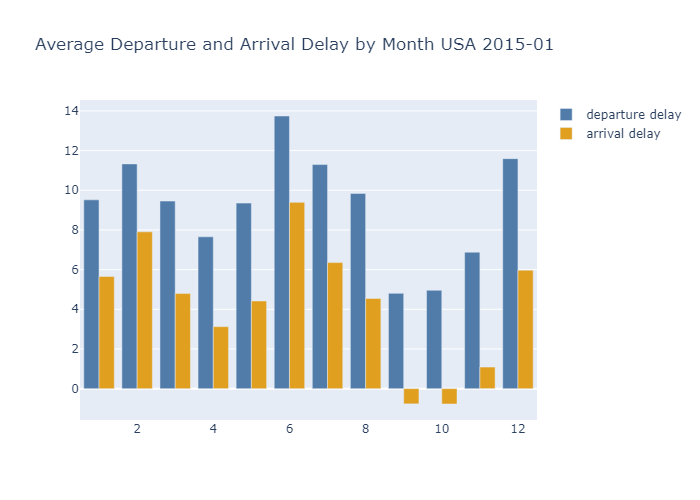

In [14]:
fig = go.Figure(data=[go.Bar(x=df.month, y=df.dep_delay, name='departure delay', marker_color='#517CAA'),
                     go.Bar(x=df.month, y=df.arr_delay, name='arrival delay', marker_color='#E09F1F')],
               layout=go.Layout(title='Average Departure and Arrival Delay by Month USA 2015-01'))
fig.show("png")

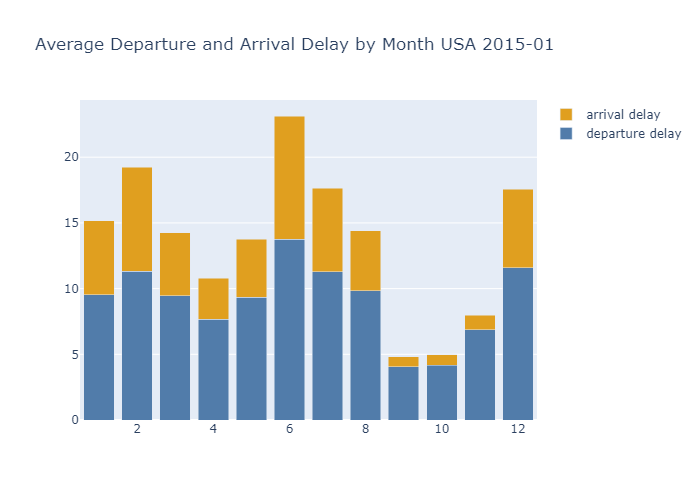

In [15]:
fig = go.Figure(data=[go.Bar(x=df.month, y=df.dep_delay, name='departure delay', marker_color='#517CAA'),
                     go.Bar(x=df.month, y=df.arr_delay, name='arrival delay', marker_color='#E09F1F')],
               layout=go.Layout(title='Average Departure and Arrival Delay by Month USA 2015-01',
                               barmode='stack'))
fig.show("png")